# Homework 1: Data-driven decison making

Read the case study *Select Collections, Inc.* included with this assignment. You will play a role similar to that of the summer intern, Marcos Kilduff. However, your assignment is not to predict `totalpay` for the observations in the test set. Instead, your task is to **decide** which of the accounts in the test set should be purchased and to **evaluate** the profits that your purchasing decisions could generate. Purchasing any individual account costs 25% of the account's balance (`cobal`).

## Instructions and Grade Breakdown

You must submit your assignment individually, and you will be graded individually, but you are expected to work on the assignment with one or two other classmates. Your role in the group is to help your classmates submit a better assignment. This is not the same as doing the assignment for them, and you should report if there are any free riders in your group. Your classmates should also help you do a better assignment or in less time than what you could have done on your own. I encourage everyone in the group to submit the same assignment, but it is OK if you submit a different assignment than other group members.

The grade breakdown for this assignment is as follows:
1. **Decision-making (50\%):** You will be evaluated primarily based on how profitable your solution is, and secondly based on how well you did compared to other groups. So, the more profits you generate, the better. Your decisions must be uploaded in a file called "decisions_NICKNAME.csv" (replace NICKNAME with your nickname; people in the same group can have the same nickname). The first column must have the header "acctid" and contain the ID of all the accounts in the test set. The second column must have the header "decision" and contain the purchase decisions for all the accounts in the test set: use a 1 for accounts you decide to purchase and a 0 for accounts you decide not to purchase. For an example of how to output a file with these characteristics, see the code below. **IMPORTANT**: You will receive no credits if the file you upload does not follow these guidelines, so please be careful.
2. **Evaluation (30\%):** You must also report an estimate of how much profits do you expect to make with your decisions. You will be evaluated primarily based on how well you estimate the profits you actually make, and secondly based on your performance compared to other groups. Your estimate must be uploaded as a non-formatted integer number in a file called "estimate_NICKNAME.txt" (replace NICKNAME with your nickname; people in the same group can have the same nickname). For an example of how to output a file with these characteristics, see the code below. **IMPORTANT**: You will receive no credits if the file you upload does not follow these guidelines, so please be careful.
3. **Teamwork (20\%):** You and your group members must evaluate each other by completing the peer evaluation in this link: https://canvas.ust.hk/courses/46343/quizzes/87071. **IMPORTANT**: You will receive no credits if you do not complete your peer evaluation as part of your submission, so please be careful. One of the questions in the evaluation is this one: `Did this group member helped you submit a better assignment or in less time than what you could have done on your own?` Your grade will depend on the answer of other group members, and their grade will depend on your answer. These are the possible answers:
   * Great: "Definitely. My assignment is much better or it took me much less time than if I had done it without them." (+10% to grade, or +20% if you are in a group of 2)
   * Acceptable: "To some extent. My assignment is slightly better or it took me slightly less time than if I had done it without them." (+5% to grade, or +10% if you are in a group of 2)
   * Worrisome: "Not really. They did not save me time or help me submit a better assignment, but they gave it an honest try." (+2% to grade, or +4% if you are in a group of 2, and the person who answered this should reach out to the corresponding group member)
   * Unacceptable: "No. And they offered me very little help or no help at all." (+0%, the person who answered this should reach out to the corresponding group member, and the professor will look into it)


4. **Code (required):** You must also submit your code and ensure your results can be reproduced. We won't evaluate your code, but you will receive no credits if we can't reproduce your results or if we suspect plagiarism (you must work on this assignment only with people in your group).

Tips:
* Don't try to build the best possible model from the start. Just try to build something that is profitable and works better than just buying all the accounts. Then, keep improving your model if you have extra time. 
* Remember to use labeled data for the evaluation.
* The following tip is optional and intended for people who want to go the extra mile with evaluation. The variance of the target variable in this data set is large, so it's possible to obtain a not-so-great evaluation estimate due to a relatively bad train/test split. To address this issue, you may want to average your evaluation results across multiple train/test splits. See the `for` loop in the code at the end of this post for an example: https://thinkingneuron.com/how-to-test-machine-learning-models-using-bootstrapping/. Alternatively, you could use nested cross-validation. You can find an example here: https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html.

A couple of other things:
* I will use your nickname to report your group's performance to the entire class. So, do not share your nickname with others (unless you don't care about everyone else knowing how well you or your group did).  
* The coding component of the final exam will be similar to this assignment. So, take this as an opportunity to practice.

# Solution

In [74]:
# Here's a brief example of how to export the files for items 1 and 2
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as smf
import plotly.express as px
from sklearn.feature_selection import SelectFromModel
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [2]:
df_train = pd.read_csv("SC Training Data.csv")
df_test = pd.read_csv("SC Test Data.csv")
your_nickname = "XXXXXXX"

In [3]:
df_train

,acctid,state,zip,rollout,cobal,collscr,cs,accessscr,lnacscr,bureauscr,eaglemod,numcalls,numrpcs,totalpay
0,1,CA,93313,Wells,1786,4013181,4,0.1992,-1.61,133,67,104,3,360
1,2,CA,92154,Wells,2048,1015805,1,0.4376,-0.83,109,6,233,6,300
2,3,FL,33319,Wells,5170,4013057,4,0.8140,-0.21,103,90,28,1,10
3,4,WA,98115,Bank_Of_Am,4506,8012265,8,0.2978,-1.21,136,11,8,2,2550
4,5,MI,49615,Associates,2706,3013630,3,0.3722,-0.99,105,42,45,11,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,3566,OH,44657,Chase,2301,3013349,3,0.6237,-0.47,110,85,41,4,1600
3566,3567,CA,90005,Associates,1763,2014341,2,0.3298,-1.11,125,19,6,2,50
3567,3568,FL,33810,Discover,4231,5012913,5,0.7195,-0.33,132,47,95,12,365
3568,3569,MD,20895,Wells,2123,3013611,3,0.2350,-1.45,121,87,48,3,728


## Example

In [5]:
##### EXAMPLE OF HOW TO CREATE FILE FOR DECISIONS
# Purchase the account if numcalls is below the mean
decisions = df_test.numcalls < df_test.numcalls.mean()
# Convert the decisions to 1s and 0s
decisions = decisions.astype(int)
# Create data frame with the decisions and export to CSV file
df_decisions = pd.DataFrame({"acctid":df_test["acctid"], "decision": decisions})
df_decisions.to_csv(f"decisions_{your_nickname}.csv", index=False)

In [6]:
##### EXAMPLE OF HOW TO CREATE FILE FOR EVALUATION
# Estimate is the average profits in the training set times the number of accounts in the test set
acc_cost = 800
estimate = (df_train.totalpay.mean() - acc_cost) * df_test.shape[0]
# Transform estimate into integer
estimate = int(estimate)
# Export results to a text file
with open(f"estimate_{your_nickname}.txt", "w") as text_file:
    text_file.write(f"{estimate:.0f}")

## 直接拟合收益

收益是totalpay - cobal*0.25， 并且不仅需要提供选择名单，还需要给出具体收益，先尝试直接拟合收益

In [13]:
df_train['profit'] = df_train['totalpay'] - df_train['cobal'] * 0.25
df_train.head(2)

,acctid,state,zip,rollout,cobal,collscr,cs,accessscr,lnacscr,bureauscr,eaglemod,numcalls,numrpcs,totalpay,profit
0,1,CA,93313,Wells,1786,4013181,4,0.1992,-1.61,133,67,104,3,360,-86.5
1,2,CA,92154,Wells,2048,1015805,1,0.4376,-0.83,109,6,233,6,300,-212.0


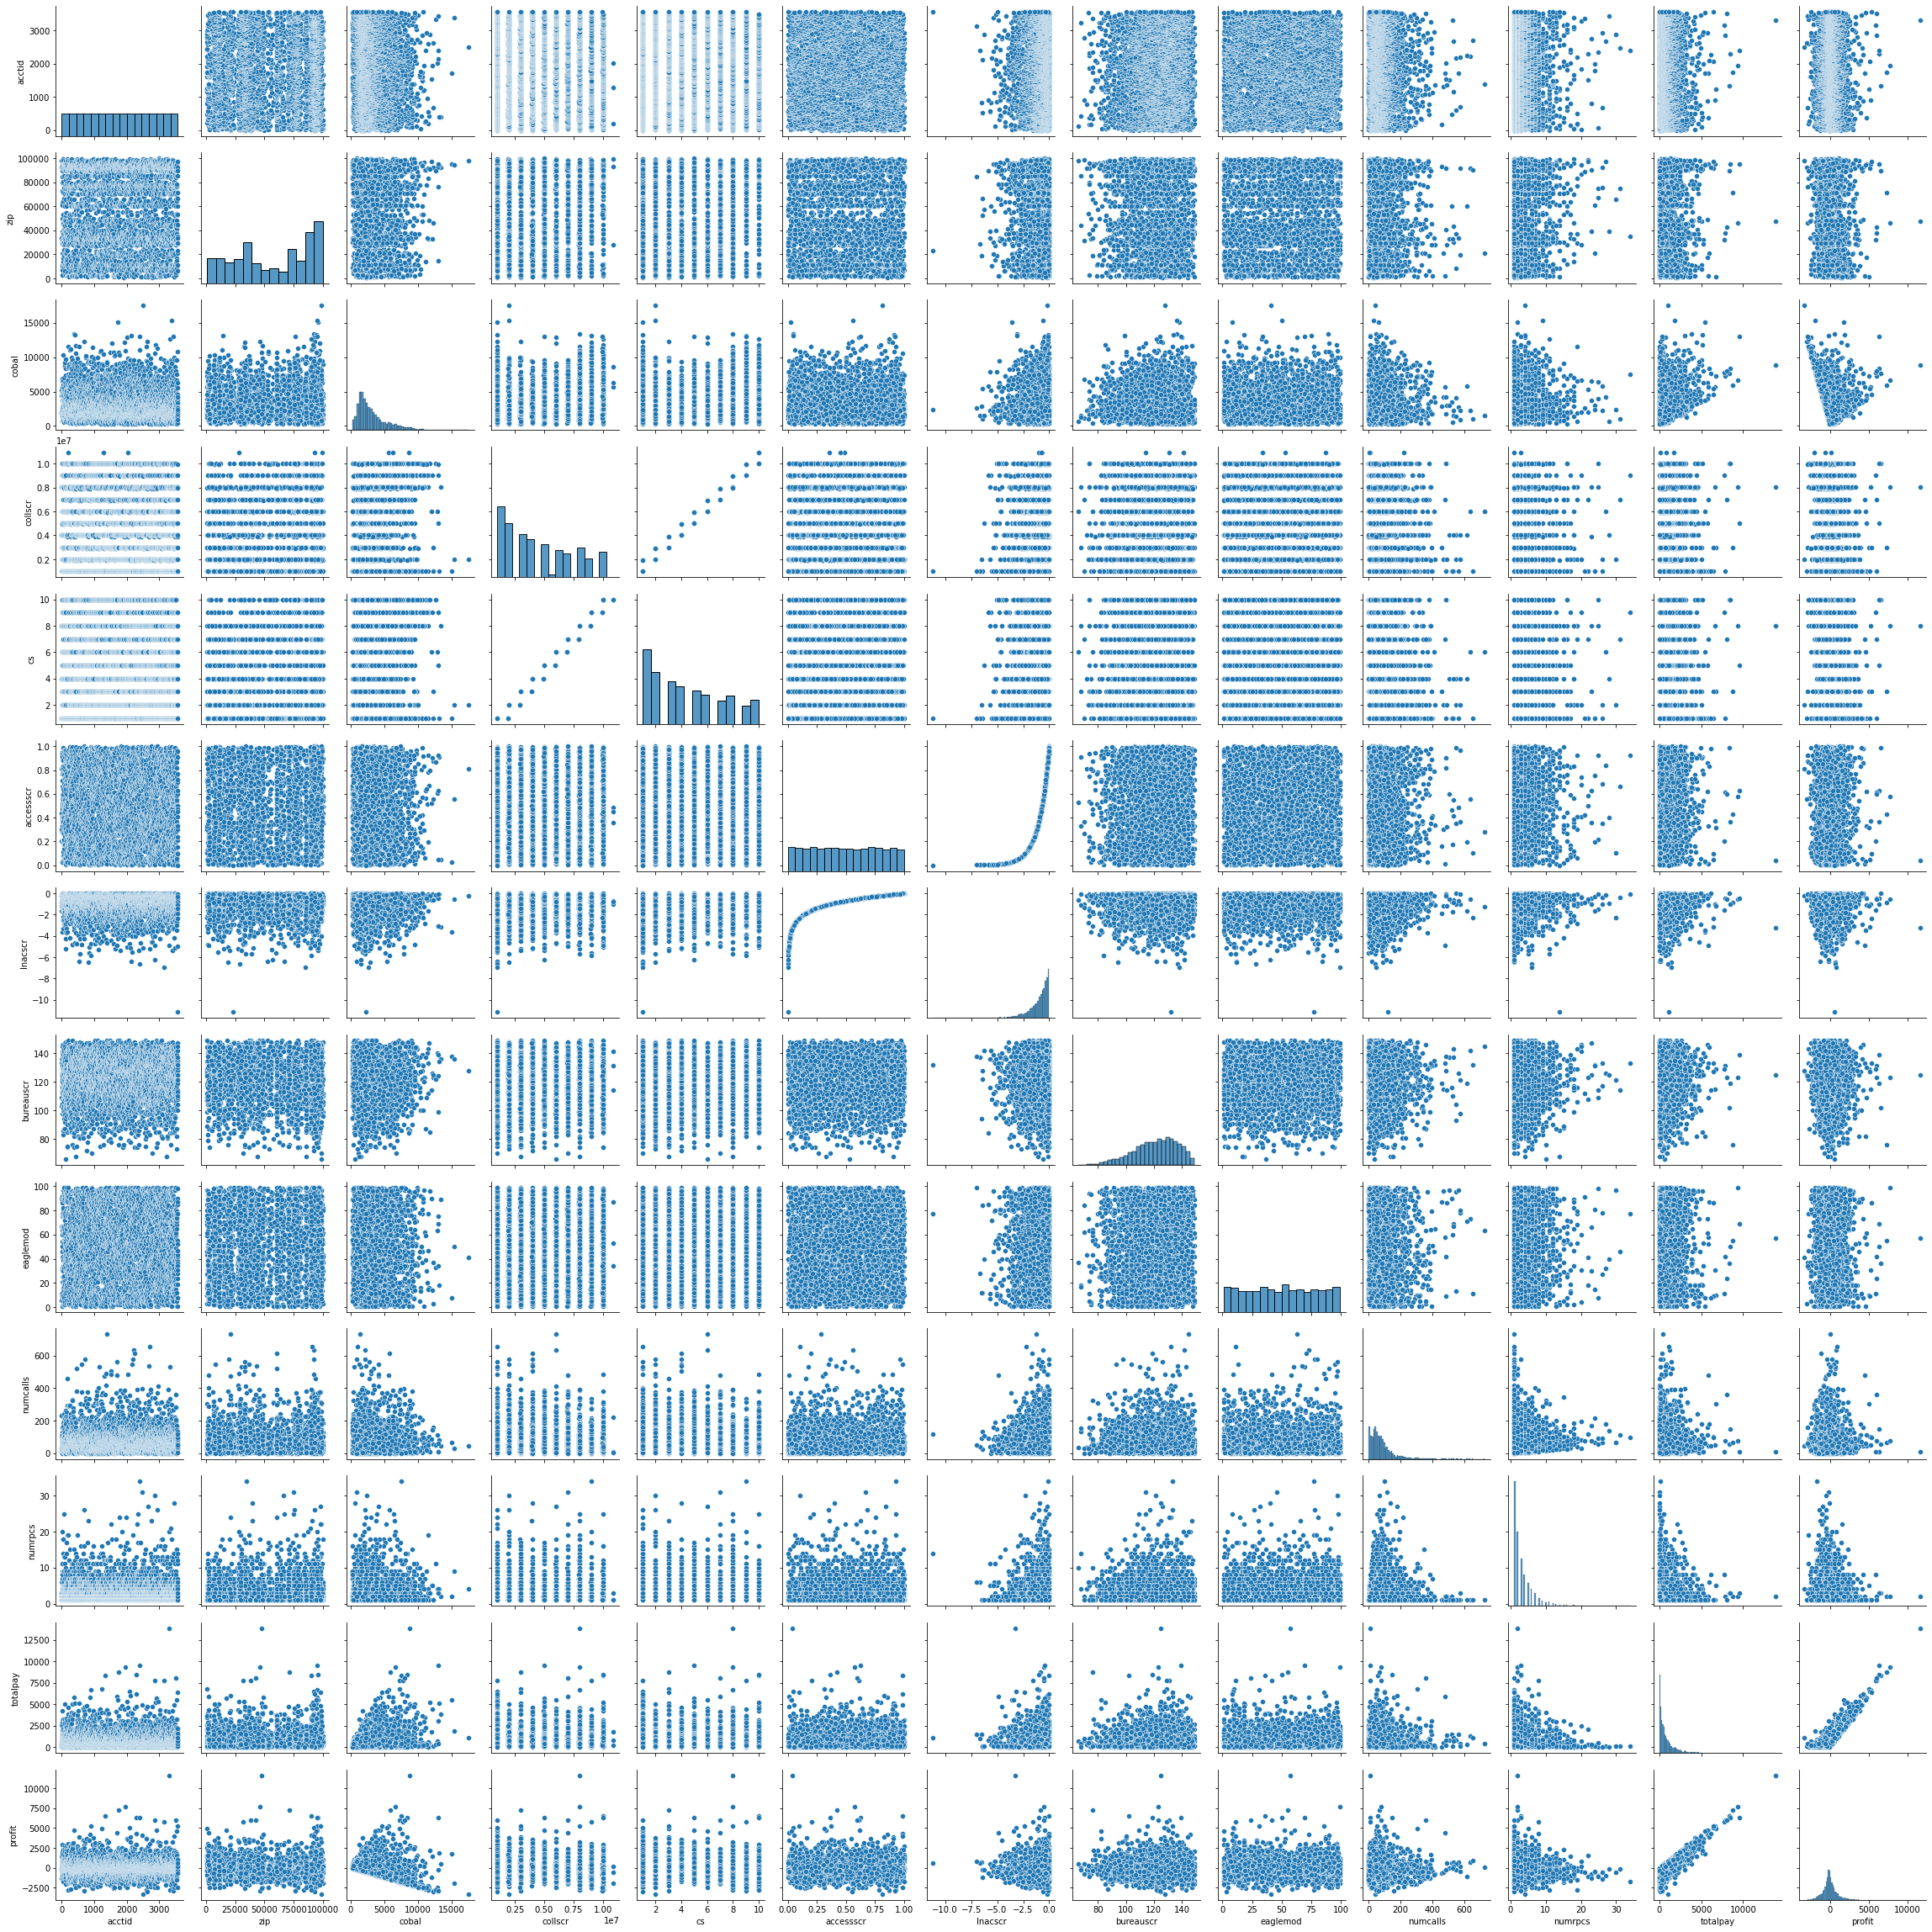

In [30]:
sns.pairplot(df_train)

可以看出来accessscr和lnacscr本身存在log转换关系，只能保留一个；cs是collscr的前两位，存在线性关系

而且totalpay和profit具有非常强的线性关系

### linear regression

In [27]:
#df_train.groupby('state').size()

In [88]:
train_features = df_train[['rollout','cobal','cs','lnacscr','bureauscr','eaglemod','numcalls','numrpcs']]
train_features = pd.get_dummies(train_features, columns= ['rollout'],drop_first = True)
train_features = smf.add_constant(train_features)
model = smf.OLS(df_train[['profit']],train_features)
results = model.fit()
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     26.25
Date:                Sun, 13 Nov 2022   Prob (F-statistic):           3.48e-66
Time:                        21:55:50   Log-Likelihood:                -29581.
No. Observations:                3570   AIC:                         5.919e+04
Df Residuals:                    3555   BIC:                         5.929e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                537.2275    139

/Users/yilingluo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



R2不到10%，拟合非常糟糕，可以看出来profit差的特别大，但预测结果在-1500到500之间

由于profit和totalpay有强相关，加入totalpay后拟合有很大问题。

In [89]:
predictions = results.predict(train_features)

In [1]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_train['profit'], y=predictions,mode='markers'))
fig.add_trace(go.Scatter(x=[-2000,2000],y=[-2000,2000],mode='lines'))

NameError: name 'go' is not defined

In [79]:
train_features_red = train_features.drop(['lnacscr','eaglemod','rollout_Chase_Bony','rollout_Chase_Rev','rollout_Wells','rollout_Wells_FIB'],axis=1)
redmodel = smf.OLS(df_train[['profit']],train_features_red)
redresults = redmodel.fit()
print (redresults.summary())

                                 OLS Regression Results                                
Dep. Variable:                 profit   R-squared (uncentered):                   0.089
Model:                            OLS   Adj. R-squared (uncentered):              0.087
Method:                 Least Squares   F-statistic:                              43.29
Date:                Sun, 13 Nov 2022   Prob (F-statistic):                    1.13e-66
Time:                        21:50:04   Log-Likelihood:                         -29591.
No. Observations:                3570   AIC:                                  5.920e+04
Df Residuals:                    3562   BIC:                                  5.925e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

### loistic regression

In [ ]:
model = smf.OLS(y_train,X_train)
results = model.fit()
print (results.summary())

In [ ]:
predictions = results.predict(X_train)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_train, y=predictions,mode='markers'))
fig.add_trace(go.Scatter(x=[-2000,2000],y=[-2000,2000],mode='lines'))